In [26]:
import tensorflow as tf
import os
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


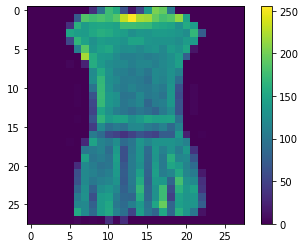

In [27]:
import matplotlib.pyplot as plt

learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

mnist = tf.keras.datasets.mnist

# read dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# x_train 이미지 하나 출력하기
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
# normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# change data shape
print(x_train.shape)  # (60000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)  # (60000, 784)

# change result to one-hot encoding
# in tf1, one_hot= True in read_data_sets("MNIST_data/", one_hot=True)
# took care of it, but here we need to manually convert them
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
# array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes. The number of rows
#  stays the same. to_categorical(labels)
# array([[ 1.,  0.,  0.],
#        [ 0.,  0.,  1.],
#        [ 0.,  1.,  0.],
#        [ 0.,  0.,  1.],
#        [ 1.,  0.,  0.]], dtype=float32)

(60000, 28, 28)
(60000, 784)


In [29]:
# create model
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit() : 모델 훈련 시 사용
history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/15
60000/60000 [==============================] - 1s 10us/sample - loss: 0.7169 - acc: 0.7593
Epoch 2/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.5040 - acc: 0.8313
Epoch 3/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4645 - acc: 0.8429
Epoch 4/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4448 - acc: 0.8482
Epoch 5/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4313 - acc: 0.8526
Epoch 6/15
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4219 - acc: 0.8558
Epoch 7/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4159 - acc: 0.8569
Epoch 8/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4108 - acc: 0.8589
Epoch 9/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4051 - acc: 0.8609
Epoch 10/15
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4007 -

In [44]:
# predict() : 임의의 입력에 대한 모델의 출력값을 확인한다.
predictions = tf.model.predict(x_test)
print('Prediction: \n', predictions)
x_train
# evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가한다.
score = tf.model.evaluate(x_test, y_test)
print('Accuracy: ', score[1])

Prediction: 
 [[7.14063788e-07 5.21361301e-08 1.84881828e-05 ... 8.15826803e-02
  1.10795470e-02 7.25732207e-01]
 [7.99140253e-04 2.61220691e-07 9.07480299e-01 ... 1.25697049e-20
  6.71426824e-05 3.77337084e-16]
 [4.25480575e-05 9.99891520e-01 6.92772619e-06 ... 1.54116823e-12
  1.89854191e-07 1.68093772e-12]
 ...
 [6.64023831e-02 4.02391743e-06 2.33383058e-03 ... 7.94023072e-06
  6.34142697e-01 6.50207141e-08]
 [3.13167288e-06 9.99471128e-01 4.44842863e-06 ... 3.43600731e-10
  1.15892284e-07 8.46499688e-08]
 [3.63612926e-05 1.76062094e-05 5.09076461e-04 ... 1.70361195e-02
  9.58340615e-03 4.28763014e-04]]
10000/10000 [==============================] - 0s 12us/sample - loss: 0.4399 - acc: 0.8479
Accuracy:  0.8479


In [46]:
# 0번에 대해 예측한 확률값들
print(predictions[0])
# 확률 값들 중 가장 큰 값
print(np.argmax(predictions[0]))
# 실제 값
print(y_test[0])

[7.1406379e-07 5.2136130e-08 1.8488183e-05 5.9056520e-06 1.0372513e-05
 1.8150869e-01 6.1289851e-05 8.1582680e-02 1.1079547e-02 7.2573221e-01]
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [102]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, pred_arr, true_arr, img_arr):
    
    # 예측한 값들 저장
    predictions_array, true_array, img = pred_arr[i], true_arr[i], img_arr[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # img는 위에서 입력값으로 줄 때 col * row 형태로 넣어줬기 때문에 원래 size로 복원해야함
    img = img.reshape(28,28)
    # gray scale로 변환하여 이미지 나타냄
    plt.imshow(img, cmap=plt.cm.binary)

    # 확률 값들 중 가장 큰 값
    predicted_number = np.argmax(predictions_array)
#     print(predicted_label)
#     print(true_label[predicted_label])

    # 실제 값(배열로 들어오기 때문에 여기서 predicted_number 위치에 있는 값을 비교해야함)
    if predicted_number == true_array[predicted_number]:
        color = 'blue'
    else:
        color = 'red'

    # {} : 예측한 값 class 이름 , {:2.0f} : 비율 , {} : 실제 값 class 이름
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_number],
                                         100*np.max(predictions_array), 
                                         class_names[int(true_array[predicted_number])]),color=color)

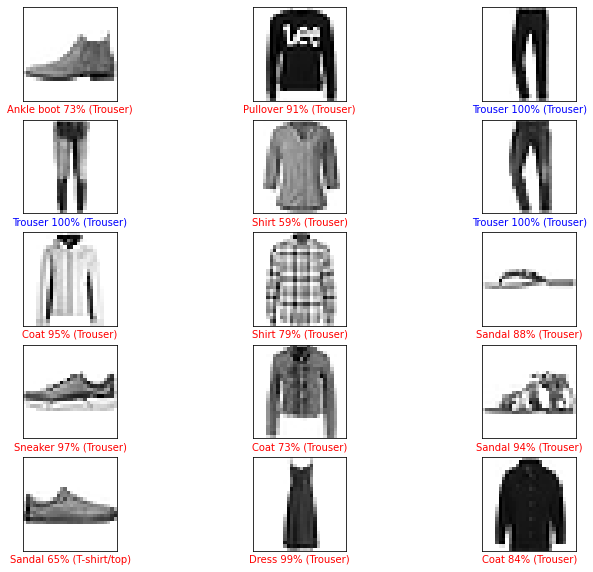

In [104]:
# 앞에서부터 15개 이미지에 대한 예측 결과를 이미지로 출력
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)

plt.show()